In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import math as mt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\Ica\Desktop\statistical-computation-team-1\student-por preprocessed def.csv", sep=';')

In [5]:
data

,school,sex,age,address,Famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Famrel,Freetime,goout,Dalc,Walc,Health,absences,G1,G2,G3
0,GP,"[0,1]",18,"[0,1]","[0,1]","[0,1]",4,4,"[0,0,0,1,0]","[1,0,0,0,0]",...,4,3,4,1,1,3,4,0,11,11
1,GP,"[0,1]",17,"[0,1]","[0,1]","[1,0]",1,1,"[0,0,0,1,0]","[0,0,0,0,1]",...,5,3,3,1,1,3,2,9,11,11
2,GP,"[0,1]",15,"[0,1]","[1,0]","[1,0]",1,1,"[0,0,0,1,0]","[0,0,0,0,1]",...,4,3,2,2,3,3,6,12,13,12
3,GP,"[0,1]",15,"[0,1]","[0,1]","[1,0]",4,2,"[0,1,0,0,0]","[0,0,1,0,0]",...,3,2,2,1,1,5,0,14,14,14
4,GP,"[0,1]",16,"[0,1]","[0,1]","[1,0]",3,3,"[0,0,0,0,1]","[0,0,0,0,1]",...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,"[0,1]",19,"[1,0]","[0,1]","[1,0]",2,3,"[0,0,1,0,0]","[0,0,0,0,1]",...,5,4,2,1,2,5,4,10,11,10
645,MS,"[0,1]",18,"[0,1]","[1,0]","[1,0]",3,1,"[1,0,0,0,0]","[0,0,1,0,0]",...,4,3,4,1,1,1,4,15,15,16
646,MS,"[0,1]",18,"[0,1]","[0,1]","[1,0]",1,1,"[0,0,0,0,1]","[0,0,0,0,1]",...,1,1,1,1,1,5,6,11,12,9
647,MS,"[1,0]",17,"[0,1]","[1,0]","[1,0]",3,1,"[0,0,1,0,0]","[0,0,1,0,0]",...,2,4,5,3,4,2,6,10,10,10


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'Famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'Failures', 'schoolsup', 'Famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Famrel', 'Freetime', 'goout', 'Dalc',
       'Walc', 'Health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
#correlation coefficient between Study time ad Failures
x=data.studytime
y=data.Failures
s=np.mean(x)
f=np.mean(y)
n=len(x)
r=np.inner((x-s),(y-f))/mt.sqrt(sum((x-s)**2)*sum((y-f)**2)) 
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with standard error SE:')
print(SE)

Correlation coefficient r:
-0.14744054515158145
with standard error SE:
0.03845941964984769


In [12]:
r=np.corrcoef(x, y)[1,0] #correlation coefficient

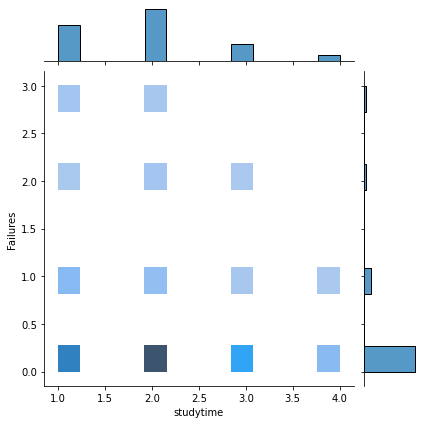

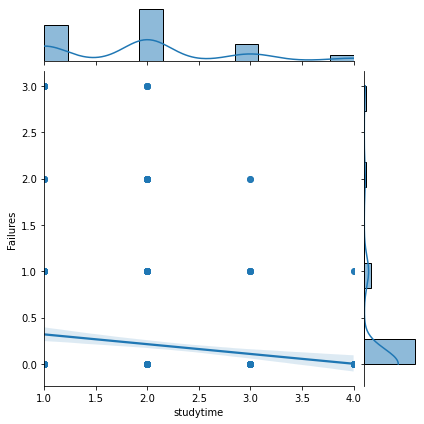

In [9]:
kdeplot=sns.jointplot(data=data, x="studytime", y="Failures", kind="hist")
sns.jointplot(data=data, x="studytime", y="Failures", kind="reg")


Text(33.0, 0.5, 'Failures')

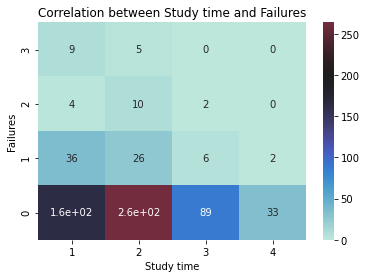

In [9]:
a=data.groupby(['studytime','Failures']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=264,center=200,annot=True)
plt.title('Correlation between Study time and Failures')
plt.xlabel('Study time')
plt.ylabel('Failures')


Correlation coefficient r:
0.249788689998863
with Standard error SE:
0.036861080126113825


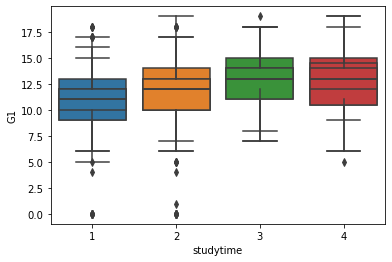

In [12]:
#correlation coefficient between Study time and Final Grade (=G3)
y=data.G3
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
ax = sns.boxplot(x="studytime", y="G3", data=data)
bx = sns.boxplot(x="studytime", y="G2", data=data)
cx = sns.boxplot(x="studytime", y="G1", data=data)
#we can see that the G3 mean for each studytime value grows as the studytime value gets higher

Text(33.0, 0.5, 'Final grade')

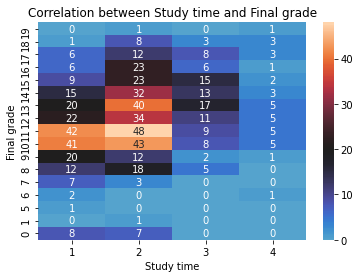

In [14]:
a=data.groupby(['studytime','G3']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=48,center=20,annot=True) #cmap="YlGnBu"
plt.title('Correlation between Study time and Final grade')
plt.xlabel('Study time')
plt.ylabel('Final grade')


Correlation coefficient r:
0.06336112772983048
with Standard error SE:
0.03915622520852588


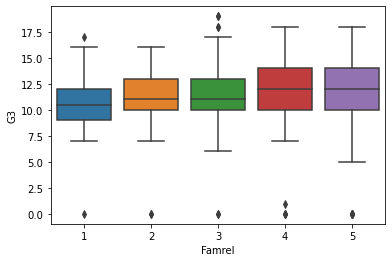

In [15]:
#correlation coefficient between Families relationship and Final Grade (=G3)
x=data.Famrel
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
ax = sns.boxplot(x="Famrel", y="G3", data=data)
#the correlation coefficient is really low

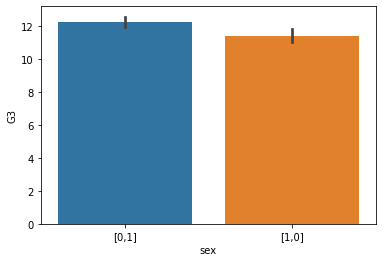

In [30]:
#correlation coefficient between Sex and Final Grade (=G3)
x=data.sex
ax = sns.barplot(x="sex", y="G3", data=data)
#[0,1]=woman ,[1,0]=man

In [28]:
#correlation between age and Final grade
x=data.age
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)

Correlation coefficient r:
0.08635734514165712
with Standard error SE:
0.03902086854077356


Correlation coefficient r:
0.08635734514165712
with Standard error SE:
0.03902086854077356


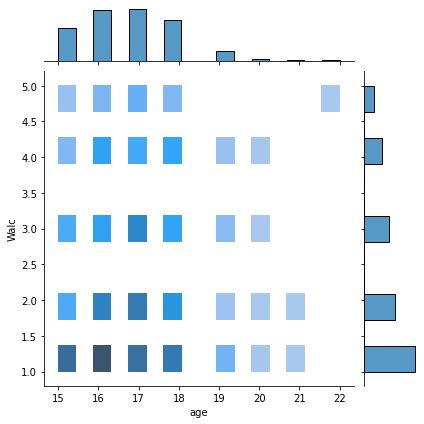

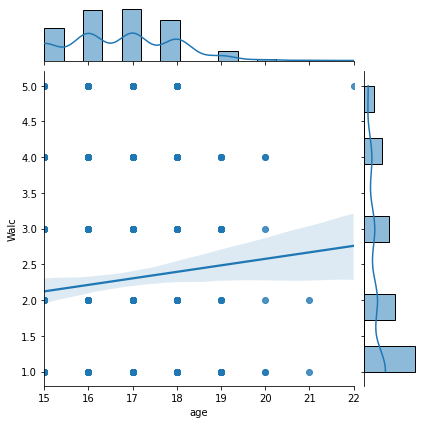

In [249]:
#correlation between age and Alcool weekendly consuption
x=data.age
y=data.Walc
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
sns.jointplot(data=data, x="age", y="Walc", kind="hist")
sns.jointplot(data=data, x="age", y="Walc", kind="reg")

